In [1]:
path_train = "/data/dust/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_joined/p22_th90_ph90_en10-100_seed42_all_steps.hdf5"
path_paper = "/data/dust/group/ilc/sft-ml/datasets/10-90GeV_x36_grid_regular_524k_float32/10-90GeV_x36_grid_regular_524k_float32.hdf5"


In [3]:
import h5py
import numpy as np
loaded_train = h5py.File(path_train)
print(f"Train keys {list(loaded_train.keys())}")
loaded_paper = h5py.File(path_paper)
print(f"Paper keys {list(loaded_paper.keys())}")

Train keys ['energy', 'events', 'n_points', 'p_norm_global', 'p_norm_local', 'phi_global', 'phi_local', 'theta_global', 'theta_local']
Paper keys ['energy', 'events']


In [8]:
train_energy = np.array(loaded_train["energy"]).flatten()
paper_energy = np.array(loaded_paper["energy"]).flatten()
train_n_pts = np.sum(loaded_train["events"][:, :, 3]>0, axis=(1))
paper_n_pts = np.sum(loaded_paper["events"][:, 3, :]>0, axis=(1))


Text(0, 0.5, '# points')

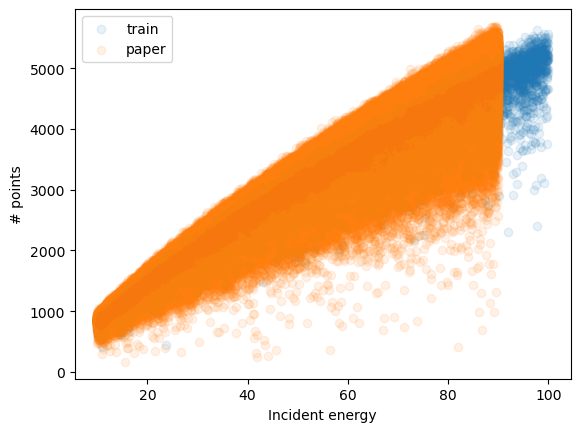

In [11]:
from matplotlib import pyplot as plt
plt.scatter(train_energy, train_n_pts, label="train", alpha=0.1)
plt.scatter(paper_energy, paper_n_pts, label="paper", alpha=0.1)
plt.legend()
plt.xlabel("Incident energy")
plt.ylabel("# points")

In [72]:
from pointcloud.utils.metadata import Metadata
from pointcloud.config_varients import caloclouds_2
config = caloclouds_2.Configs()


In [76]:
config.dataset_path_in_storage = False
config.dataset_path = "/data/dust/group/ilc/sft-ml/datasets/10-90GeV_x36_grid_regular_524k_float32/10-90GeV_x36_grid_regular_524k_float32.hdf5"
meta = Metadata(config)

In [77]:
meta


Metadata for /data/dust/group/ilc/sft-ml/datasets/10-90GeV_x36_grid_regular_524k_float32/10-90GeV_x36_grid_regular_524k_float32.hdf5
layer_bottom_pos_hdf5: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
half_cell_size_global: 2.5441665649414062
cell_thickness_global: 0.5250244140625
half_cell_size_hdf5: 2.5441665649414062
cell_thickness_hdf5: 1.0
gun_xyz_pos_hdf5: [  0.   0. -40.]
orientation: hdf5:xyz==local:yzx
gun_xyz_pos_global: [   0.    40.  1804.7]
orientation_global: hdf5:xyz==global:xyz
layer_bottom_pos_global: [1811.34020996 1814.46508789 1823.81005859 1826.93505859 1836.2800293
 1839.4050293  1848.75       1851.875      1861.2199707  1864.3449707
 1873.68994141 1876.81494141 1886.16003418 1889.28503418 1898.63000488
 1901.75500488 1911.09997559 1914.22497559 1923.56994629 1926.69494629
 1938.14001465 1943.36499023 1954.81005859 1960.03503418 1971.47998047
 1976.70495605 1988.15002441 1993.375      20

In [75]:
loaded = np.load("pointcloud/metadata/10-90GeV_x36_grid_regular_524k_W/gun_xyz_pos_global.npy", allow_pickle=True)
loaded[1] = 40
np.save("pointcloud/metadata/10-90GeV_x36_grid_regular_524k_W/gun_xyz_pos_global.npy", loaded)

IndexError: boolean index did not match indexed array along axis 1; size of axis is 4 but size of corresponding boolean axis is 6000

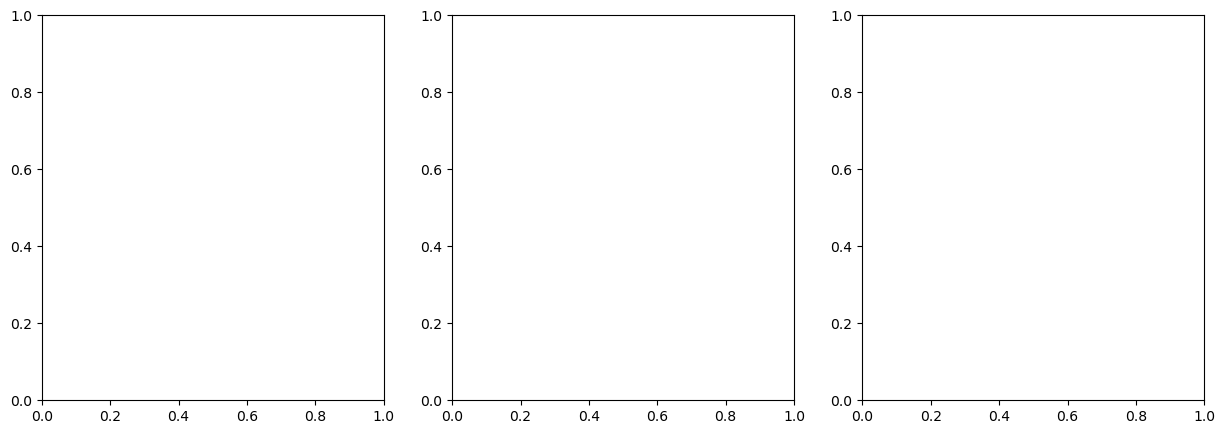

In [26]:
events = np.array(loaded_paper["events"])
mask = events[:, 3]>0



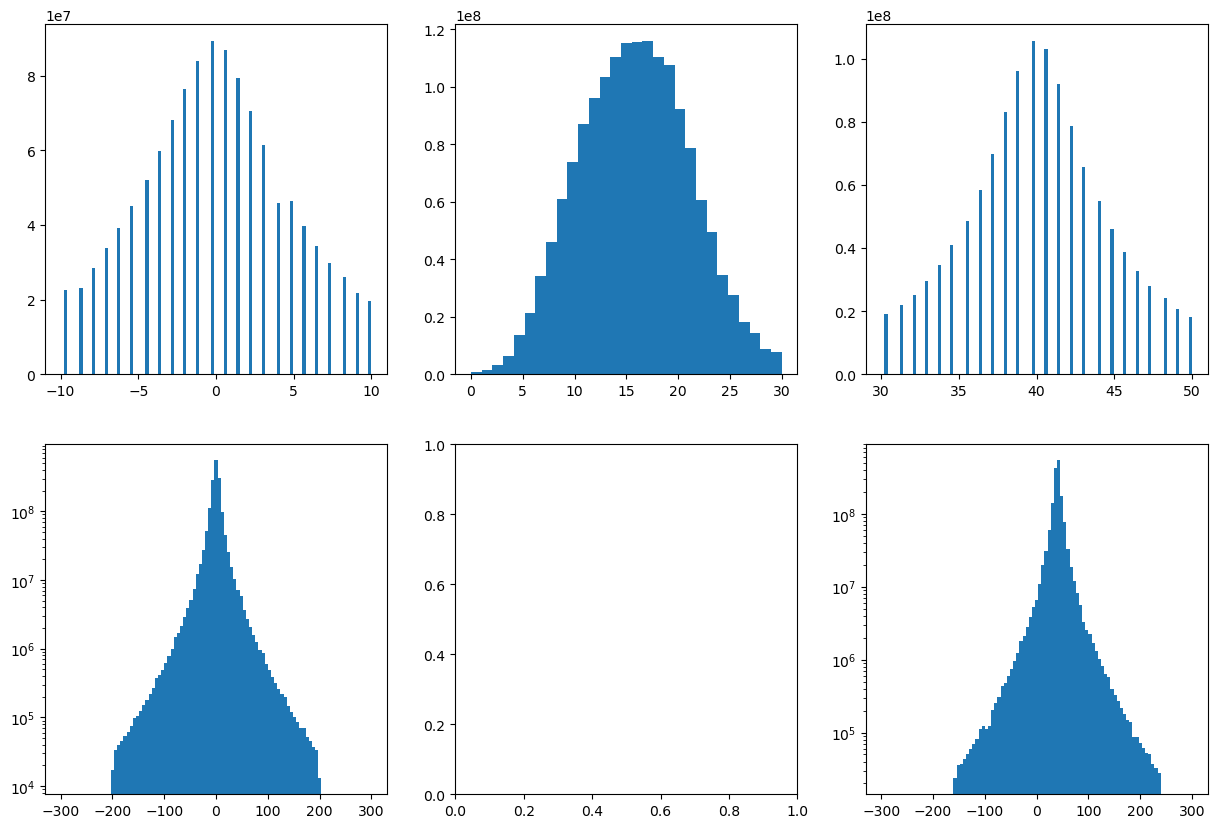

In [71]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 10))
axarr[0, 0].hist(events[:, 0][mask], bins=np.linspace(-10, 10, 100))
axarr[0, 1].hist(events[:, 1][mask], bins=np.linspace(0, 30, 30))
axarr[0, 2].hist(events[:, 2][mask], bins=np.linspace(30, 50, 100))
axarr[1, 0].hist(events[:, 0][mask], bins=np.linspace(-300, 300, 100))
axarr[1, 0].semilogy()
axarr[1, 2].hist(events[:, 2][mask], bins=np.linspace(-300, 300, 100));
axarr[1, 2].semilogy();

In [78]:
configs2 = caloclouds_2.Configs()
configs2.dataset_path_in_storage = False
configs2.dataset_path = path_train
meta2   = Metadata(configs2)

In [79]:
print(repr(meta))
print(repr(meta2))


Metadata for /data/dust/group/ilc/sft-ml/datasets/10-90GeV_x36_grid_regular_524k_float32/10-90GeV_x36_grid_regular_524k_float32.hdf5
layer_bottom_pos_hdf5: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.]
half_cell_size_global: 2.5441665649414062
cell_thickness_global: 0.5250244140625
half_cell_size_hdf5: 2.5441665649414062
cell_thickness_hdf5: 1.0
gun_xyz_pos_hdf5: [  0.   0. -40.]
orientation: hdf5:xyz==local:yzx
gun_xyz_pos_global: [   0.    40.  1804.7]
orientation_global: hdf5:xyz==global:xyz
layer_bottom_pos_global: [1811.34020996 1814.46508789 1823.81005859 1826.93505859 1836.2800293
 1839.4050293  1848.75       1851.875      1861.2199707  1864.3449707
 1873.68994141 1876.81494141 1886.16003418 1889.28503418 1898.63000488
 1901.75500488 1911.09997559 1914.22497559 1923.56994629 1926.69494629
 1938.14001465 1943.36499023 1954.81005859 1960.03503418 1971.47998047
 1976.70495605 1988.15002441 1993.375      20

In [42]:
events2 = np.array(loaded_train["events"])
mask2 = events2[:, :, 3]>0


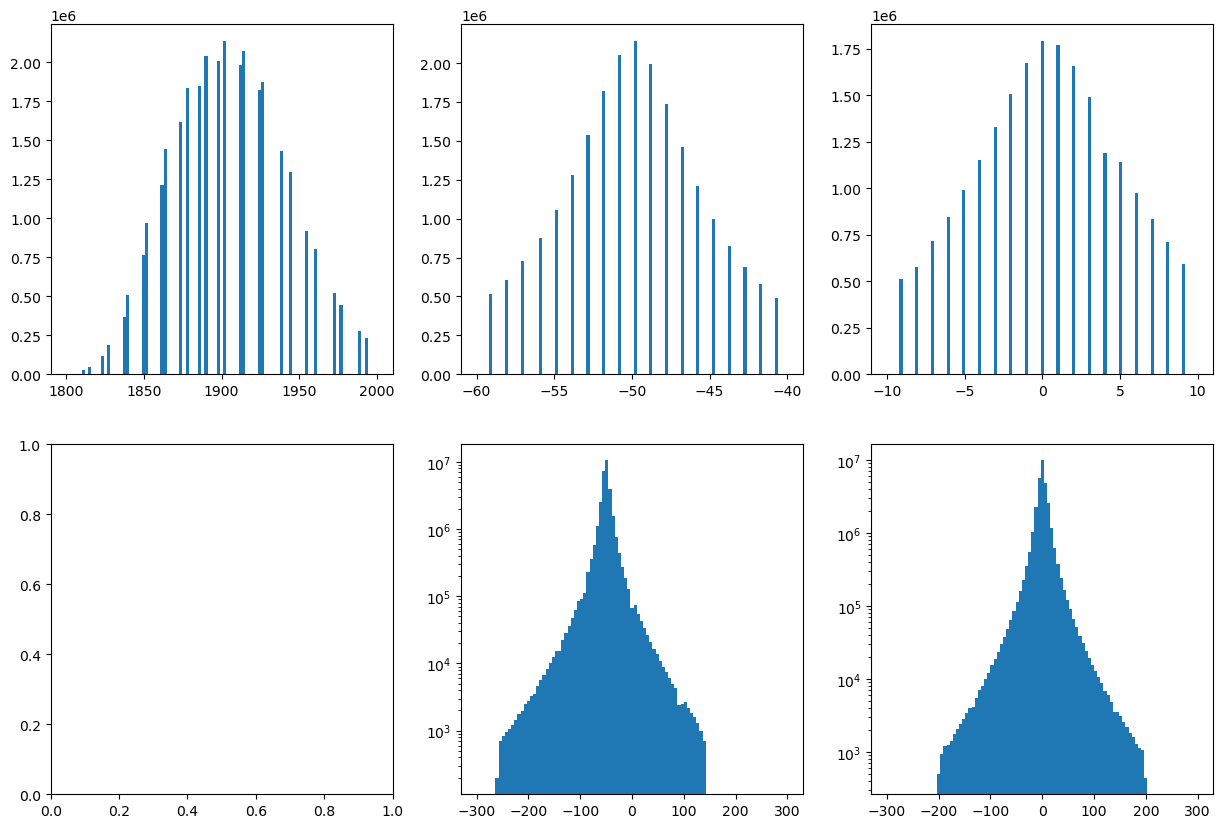

In [69]:
fig, axarr = plt.subplots(2, 3, figsize=(15, 10))
axarr[0, 0].hist(events2[:, :, 1][mask2], bins=np.linspace(1800, 2000, 100))
axarr[0, 1].hist(events2[:, :, 2][mask2], bins=np.linspace(-60, -40, 100))
axarr[0, 2].hist(events2[:, :, 0][mask2], bins=np.linspace(-10, 10, 100));
axarr[1, 1].hist(events2[:, :, 2][mask2], bins=np.linspace(-300, 300, 100))
axarr[1, 1].semilogy()
axarr[1, 2].hist(events2[:, :, 0][mask2], bins=np.linspace(-300, 300, 100));
axarr[1, 2].semilogy();

In [63]:
len(events)


524959

In [65]:
len(events2)

10000

In [67]:
configs3 = caloclouds_2.Configs()
configs3.dataset_path_in_storage = False
configs3.dataset_path = path_train
meta3 = Metadata(configs3)
meta3

Metadata for /data/dust/user/dayhallh/data/ILCsoftEvents/p22_th90_ph90_en10-100_joined/p22_th90_ph90_en10-100_seed42_all_steps.hdf5
layer_bottom_pos_hdf5: [1811.34020996 1814.46508789 1823.81005859 1826.93505859 1836.2800293
 1839.4050293  1848.75       1851.875      1861.2199707  1864.3449707
 1873.68994141 1876.81494141 1886.16003418 1889.28503418 1898.63000488
 1901.75500488 1911.09997559 1914.22497559 1923.56994629 1926.69494629
 1938.14001465 1943.36499023 1954.81005859 1960.03503418 1971.47998047
 1976.70495605 1988.15002441 1993.375      2004.81994629 2010.04504395]
half_cell_size_global: 2.5441665649414062
cell_thickness_global: 0.5250244140625
half_cell_size_hdf5: 2.5441665649414062
cell_thickness_hdf5: 0.5250244140625
gun_xyz_pos_hdf5: [   0. 1811.  -50.]
orientation: hdf5:xyz==local:yzx
gun_xyz_pos_global: [   0.  1804.7  -50. ]
orientation_global: hdf5:xyz==global:xyz
layer_bottom_pos_global: [1811.34020996 1814.46508789 1823.81005859 1826.93505859 1836.2800293
 1839.405029

In [84]:
loaded = np.load("pointcloud/metadata/gun_henry_highGran/downsample_settings.npy", allow_pickle=True).item()
loaded['dm'] = 6
np.save("pointcloud/metadata/gun_henry_highGran/downsample_settings.npy", loaded)

In [85]:
path = "/data/dust/user/dayhallh/data/ILCsoftEvents/highGran_p22_th90_ph90_en10-100/highGran_all_steps.hdf5"
file = h5py.File(path, 'r')
print(file.keys())

<KeysViewHDF5 ['energy', 'events', 'n_points', 'p_norm_global', 'p_norm_local', 'phi_global', 'phi_local', 'theta_global', 'theta_local']>


In [86]:
events3 = np.array(file['events'])
print(events3.shape)

(1000, 10000, 4)


In [87]:
events3


array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       ...,

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0.],
        [0., 0.